In [1]:
from retino.retinomap import *
import dill

reading stim0.tif in /Users/kaan/src/temp/grating/190828_KC009_1P_KC/run01_checkerboard_highSF/stimaverages_cam3
reading stim1.tif in /Users/kaan/src/temp/grating/190828_KC009_1P_KC/run01_checkerboard_highSF/stimaverages_cam3
reading stim2.tif in /Users/kaan/src/temp/grating/190828_KC009_1P_KC/run01_checkerboard_highSF/stimaverages_cam3
reading stim3.tif in /Users/kaan/src/temp/grating/190828_KC009_1P_KC/run01_checkerboard_highSF/stimaverages_cam3
reading stim0.tif in /Users/kaan/src/temp/grating/190828_KC009_1P_KC/run00_checkerboard_lowSF/stimaverages_cam3
reading stim1.tif in /Users/kaan/src/temp/grating/190828_KC009_1P_KC/run00_checkerboard_lowSF/stimaverages_cam3
reading stim2.tif in /Users/kaan/src/temp/grating/190828_KC009_1P_KC/run00_checkerboard_lowSF/stimaverages_cam3
reading stim3.tif in /Users/kaan/src/temp/grating/190828_KC009_1P_KC/run00_checkerboard_lowSF/stimaverages_cam3
Surface image not found, extracting from avg movie
Patching signmap low
46 patches found with thresh

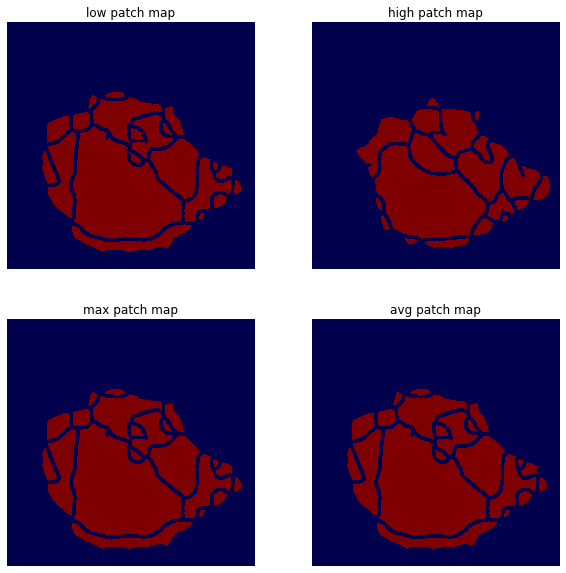

In [2]:
a = RetinoMaps()
main_path = '/Users/kaan/src/temp/grating/190828_KC009_1P_KC'
load_path = '/Users/kaan/src/temp/analysis/KC008/KC008.retino'
a.init_RetinoMap(main_path)

In [3]:
b=load_RetinoMap(load_path)

Loading from /Users/kaan/src/temp/analysis/KC008/KC008.retino
Loaded!


In [6]:
k=b.__dict__.keys()

In [93]:
a=list(smap.shape)
a.append(3)
channels=np.zeros(a)

In [48]:
_,binedges=np.histogram(smap,bins=3)

In [49]:
binedges

array([-0.87257113, -0.27958982,  0.3133915 ,  0.90637281])

In [96]:
np.max(smap)

0.9063728072949769

In [94]:
channels[:,:,0] = np.where(smap<binedges[1],smap,channels[:,:,0])*(-1)*255
channels[:,:,2] = np.where(smap>binedges[2],smap,channels[:,:,2])*255
mid = np.where(np.logical_and(binedges[1]<smap, smap<binedges[2]),smap,channels[:,:,1])*255
channels[:,:,0] += mid
channels[:,:,2] += mid

222.50563784951805

In [95]:
bgr_img=cv2.imwrite('test.png',channels)

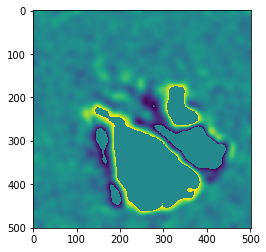

In [83]:
plt.imshow(mid)

In [4]:
import matplotlib.pyplot as plt


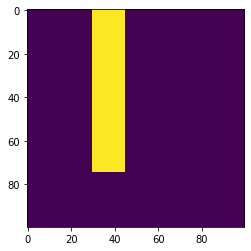

In [7]:
x=np.zeros((100,100))
x[0:75,30:45]=1
plt.imshow(x)

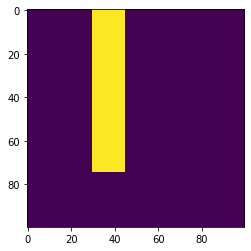

In [8]:
#find CoM of objects
x = x / np.sum(np.sum(x))
plt.imshow(x)

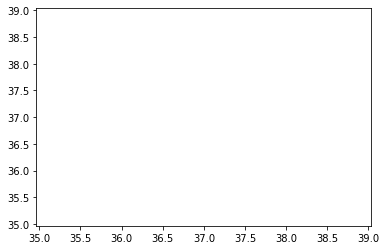

In [9]:
dx = np.sum(x, 1)
dy = np.sum(x, 0)

# expected values
cx = np.sum(dx * np.arange(x.shape[0]))
cy = np.sum(dy * np.arange(x.shape[1]))

plt.scatter(cx,cy )